<a href="https://colab.research.google.com/github/Izabelson/Flight_delay/blob/main/Flight_delay_exploratory_analysis_types_of_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Data loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
flights = pd.read_csv("/content/drive/MyDrive/DataScience/new_flights.csv", low_memory=True)

flights.sample(10)

,MONTH,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
4151031,9,1,United Airlines,661,N492UA,Los Angeles International Airport,Louis Armstrong New Orleans International Airport,14:56:00,-11.0,195.0,1670,20:44:00,-22.0,0.0,0.0,0.0,0.0,0.0,2015-09-21
192395,1,2,Delta Airlines,2346,N377NW,Hartsfield-Jackson Atlanta International Airport,Chicago Midway International Airport,18:55:00,20.0,97.0,591,19:55:00,9.0,0.0,0.0,0.0,0.0,0.0,2015-01-13
824141,2,4,Virgin America,740,N530VA,San Francisco International Airport,Seattle-Tacoma International Airport,08:00:00,-7.0,111.0,679,10:05:00,-2.0,0.0,0.0,0.0,0.0,0.0,2015-02-26
1661307,4,1,SkyWest Airlines,5393,N963SW,Chicago O'Hare International Airport,Fort Wayne International Airport,07:50:00,-6.0,37.0,157,09:48:00,1.0,0.0,0.0,0.0,0.0,0.0,2015-04-20
1144480,3,3,Delta Airlines,915,N3762Y,Hartsfield-Jackson Atlanta International Airport,Cincinnati/Northern Kentucky International Air...,19:12:00,-7.0,59.0,373,20:39:00,-12.0,0.0,0.0,0.0,0.0,0.0,2015-03-18
4566347,11,3,Envoy Air,3226,N609MQ,Cincinnati/Northern Kentucky International Air...,Dallas/Fort Worth International Airport,06:09:00,-9.0,157.0,812,08:10:00,27.0,27.0,0.0,0.0,0.0,0.0,2015-11-18
3744029,8,3,Southwest Airlines,2737,N238WN,Hartsfield-Jackson Atlanta International Airport,Chicago Midway International Airport,08:00:00,-5.0,87.0,591,08:55:00,-10.0,0.0,0.0,0.0,0.0,0.0,2015-08-26
3285118,7,3,Southwest Airlines,491,N274WN,Hartsfield-Jackson Atlanta International Airport,Los Angeles International Airport,08:35:00,-2.0,241.0,1947,10:25:00,-15.0,0.0,0.0,0.0,0.0,0.0,2015-07-29
584645,2,2,JetBlue Airways,1039,N229JB,Gen. Edward Lawrence Logan International Airport,Austin-Bergstrom International Airport,06:38:00,-7.0,237.0,1698,10:33:00,-16.0,0.0,0.0,0.0,0.0,0.0,2015-02-10
1388770,4,4,Delta Airlines,779,N817DN,Salt Lake City International Airport,McCarran International Airport,20:20:00,-1.0,57.0,368,20:41:00,2.0,0.0,0.0,0.0,0.0,0.0,2015-04-02


# Delay format change

In the column 'DEPARTURE_DELAY' and 'ARRIVAL_DELAY' we can see values below 0 which indicates departure or arrival before sheduled time and values above 0, that indicated delays. We decided to change the format. For values <0 we set 0 as NO DELAY and >0 as 1 that will be delay.

In [4]:
status = []

for value in flights['ARRIVAL_DELAY']:
    if value <= 0:
        status.append(0)
    elif value in range(1, 15):
        status.append(1)
    elif value in range(15, 180):
        status.append(2)
    elif value in range(180, 300):
        status.append(3)
    else:
        status.append(4)
flights['FLIGHT_STATUS'] = status 

In [15]:
pd.DataFrame(flights['FLIGHT_STATUS'].value_counts())

,FLIGHT_STATUS
0,3285484
2,957984
1,942286
3,34922
4,10454


<ipython-input-8-6f4dfacd41bc>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 500000.0, '500,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1500000.0, '1,500,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 2500000.0, '2,500,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 3500000.0, '3,500,000'),
 Text(0, 4000000.0, '4,000,000')]

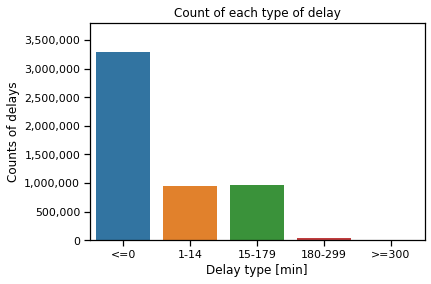

In [8]:
sns.set_context("notebook")
g=sns.countplot(x="FLIGHT_STATUS",data=flights)
g.set(xlabel="Delay type [min]")
g.set(ylabel="Counts of delays")
labels = [item.get_text() for item in g.get_xticklabels()]
labels = ['<=0', '1-14', '15-179', '180-299', '>=300']
g.set_title('Count of each type of delay')
g.set_xticklabels(labels)
g.set(ylim=(0, 3800000))
current_values = g.get_yticks()
g.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
